In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('DoBIH_v17_4.xlsx')

In [3]:
mountains = ['Ben Nevis', 'Carn Mor Dearg', 'Aonach Mor', 'Aonach Beag']

result = []
for m in mountains:
    result.append(df.loc[(df['Name'].str.contains(m)) & (df['Topo Section'].str.contains('Ben Nevis'))])
    
df_m = pd.concat(result, ignore_index=True)
df_m = df_m[['Number','Name', 'Metres', 'Drop', 'Climbed', 'Xcoord', 'Ycoord', 'Latitude', 'Longitude']]
df_m

,Number,Name,Metres,Drop,Climbed,Xcoord,Ycoord,Latitude,Longitude
0,278,Ben Nevis [Beinn Nibheis],1344.53,1344.5,NaN,216666,771288,56.796891,-5.003675
1,282,Carn Mor Dearg,1220.00,162.0,NaN,217748,772172,56.805246,-4.986616
2,281,Aonach Mor,1220.40,133.0,NaN,219306,772962,56.812941,-4.961712
3,279,Aonach Beag,1234.00,404.0,NaN,219706,771502,56.799998,-4.954138


In [4]:
hmap = np.load('terr-50.npy')

In [5]:
from src.models import MapGrid, Coordinate

In [6]:
new_map = MapGrid(hmap, bottom_left=Coordinate(0, 0), top_right=Coordinate(700000, 1300000))

In [7]:
start = df_m.loc[df_m['Name'].str.contains('Aonach Mor')]
end = df_m.loc[df_m['Name'].str.contains('Aonach Beag')]

start_coord = Coordinate(x=start['Xcoord'].values[0], y=start['Ycoord'].values[0])
end_coord = Coordinate(x=end['Xcoord'].values[0], y=end['Ycoord'].values[0])

In [8]:
offset = Coordinate(x=5000, y=5000)

In [9]:
ben_map = new_map.subset(bottom_left=start_coord-offset, top_right=end_coord+offset)

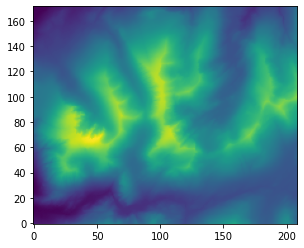

In [10]:
plt.imshow(ben_map.grid, origin='lower')

In [11]:
from src.heuristic import naismith_estimate
from src.a_star import a_star_search

In [12]:
route, distance = a_star_search(ben_map, 
                               ben_map.coordinate_to_grid_position(start_coord), 
                               ben_map.coordinate_to_grid_position(end_coord), 
                               naismith_estimate)

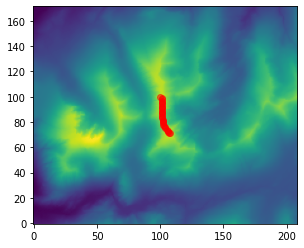

In [13]:
xs = [c.x for c in route]
ys=  [c.y for c in route]
zs=  [c.z for c in route]

plt.imshow(ben_map.grid, origin='lower')
plt.scatter(xs, ys, c='r', alpha=0.5)

In [14]:
distance

39.40461387823999

# All Possible Permutations

In [15]:
from src.route_planning import RoutePlanner

routeplan = RoutePlanner(heightmap=ben_map, 
                         heuristic=naismith_estimate, 
                         waypoints=df_m)
routeplan.plan(waypoints=df_m['Name'].tolist())

0 ('Ben Nevis [Beinn Nibheis]', 'Carn Mor Dearg')
Coordinate(x=216666, y=771288, z=0.0) Coordinate(x=217748, y=772172, z=0.0)
46.661240010100705
1 ('Ben Nevis [Beinn Nibheis]', 'Aonach Mor')
Coordinate(x=216666, y=771288, z=0.0) Coordinate(x=219306, y=772962, z=0.0)
97.32706948437897
2 ('Ben Nevis [Beinn Nibheis]', 'Aonach Beag')
Coordinate(x=216666, y=771288, z=0.0) Coordinate(x=219706, y=771502, z=0.0)
102.5850853069301
3 ('Carn Mor Dearg', 'Ben Nevis [Beinn Nibheis]')
Coordinate(x=217748, y=772172, z=0.0) Coordinate(x=216666, y=771288, z=0.0)
59.71991234232232
4 ('Carn Mor Dearg', 'Aonach Mor')
Coordinate(x=217748, y=772172, z=0.0) Coordinate(x=219306, y=772962, z=0.0)
Got to the end and nothing happened
inf
5 ('Carn Mor Dearg', 'Aonach Beag')
Coordinate(x=217748, y=772172, z=0.0) Coordinate(x=219706, y=771502, z=0.0)
74.64858589524704
6 ('Aonach Mor', 'Ben Nevis [Beinn Nibheis]')
Coordinate(x=219306, y=772962, z=0.0) Coordinate(x=216666, y=771288, z=0.0)
108.96574669941299
7 ('Aona

,Start,Stop,Time,Route Index
0,Ben Nevis [Beinn Nibheis],Carn Mor Dearg,46.661240,0
1,Ben Nevis [Beinn Nibheis],Aonach Mor,97.327069,1
2,Ben Nevis [Beinn Nibheis],Aonach Beag,102.585085,2
3,Carn Mor Dearg,Ben Nevis [Beinn Nibheis],59.719912,3
4,Carn Mor Dearg,Aonach Mor,inf,4
5,Carn Mor Dearg,Aonach Beag,74.648586,5
6,Aonach Mor,Ben Nevis [Beinn Nibheis],108.965747,6
7,Aonach Mor,Carn Mor Dearg,66.029904,7
8,Aonach Mor,Aonach Beag,39.404614,8
9,Aonach Beag,Ben Nevis [Beinn Nibheis],112.975082,9
